In [1]:
import matplotlib.pyplot as plt
import numpy as np
import idx2numpy


In [2]:
test_images = idx2numpy.convert_from_file('t10k-images.idx3-ubyte')
test_labels = idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')
train_images = idx2numpy.convert_from_file('train-images.idx3-ubyte')
train_labels = idx2numpy.convert_from_file('train-labels.idx1-ubyte')

In [3]:
print(test_images.shape)
print(test_labels.shape)
print(train_images.shape)
print(train_labels.shape)


(10000, 28, 28)
(10000,)
(60000, 28, 28)
(60000,)


In [4]:
train_images_flat=train_images.reshape(train_images.shape[0], -1).T
test_images_flat=test_images.reshape(test_images.shape[0], -1).T

In [68]:
print(train_images_flat.shape)
print(test_images_flat.shape)
m = train_images_flat.shape[1]
X = train_images_flat/255

(784, 60000)
(784, 10000)


In [69]:
Y = train_labels.reshape(train_labels.shape[0],1).T # Y.shape is (1, m)
Y.shape

(1, 60000)

In [70]:
def initialize():
    global W,b
    W = np.random.randn(train_images_flat.shape[0], 1)*np.sqrt(1/m) # W.shape is (n_x,1)
    b = np.zeros((1,m)) #b.shape is (1,m)

In [71]:
print(W.shape)
print(b.shape)

(784, 1)
(1, 60000)


In [72]:
def sigmoid(z):
    a = 1/(1+np.exp(-z))
    return a

In [73]:
def forward():
    global Z,A
    Z = np.dot(W.T, X) + b # Z.shape is (1,m)
    A = sigmoid(Z)

In [74]:
def cost():
    global L,J
# Calculate Loss
    L = -(Y*np.log(A) + (1-Y)*np.log(1-A)) # L.shape is (1,m)
    #calculate Cost
    J = np.sum(L, keepdims=True, axis=1)*(1/m) # J.shape is (1,1) if keepdims==True else J.shape is ()

In [75]:
# deivatives
def backward():
    global dZ, dW, db
    #dJ/dZ
    dZ = A-Y  # dZ.shape is (1,m)

    #dJ/dW = sum(dL/dW)/m  which should be equivalent to   np.dot(X,dZ.T)/m
    # (dW == np.dot(X, dZ.T)).all() :gives True
    '''
    dLdW = X*dZ  # dLdW.shape is (n_x, m)
    dW = np.sum(dLdW, keepdims=True, axis=1)/m  #dW.shape is (n_x,1) [same as W.shape]
    '''
    dW = np.dot(X, dZ.T) / m
    #dJ/db
    db = np.sum(dZ, keepdims=True, axis=1)/m  # db.shape = (1,1)

In [76]:
initialize()

In [77]:
#optimise
alpha = 0.002
iterations = 20

for i in range(iterations):
    forward()
    cost()
    print(f'Cost at {i}th loop = {J}')
    backward()
    W = W - alpha*dW
    b = b - alpha*db

Cost at 0th loop = [[143.17501272]]
Cost at 1th loop = [[175.1521877]]
Cost at 2th loop = [[211.06989012]]
Cost at 3th loop = [[250.365229]]
Cost at 4th loop = [[292.44436505]]
Cost at 5th loop = [[336.75798251]]
Cost at 6th loop = [[382.83604214]]
Cost at 7th loop = [[430.29452815]]
Cost at 8th loop = [[478.82804279]]
Cost at 9th loop = [[528.19735586]]
Cost at 10th loop = [[578.21655197]]
Cost at 11th loop = [[628.74167091]]
Cost at 12th loop = [[679.66135419]]
Cost at 13th loop = [[730.88941778]]
Cost at 14th loop = [[782.35906648]]
Cost at 15th loop = [[834.01843155]]
Cost at 16th loop = [[885.82714538]]
Cost at 17th loop = [[937.75371647]]
Cost at 18th loop = [[989.77351758]]
Cost at 19th loop = [[1041.86724204]]


In [44]:
ax=np.arange(0,100,1).reshape(1,100)

In [47]:
ay = A[:,:100]

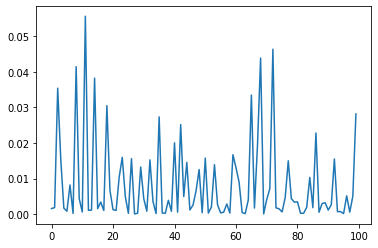

In [48]:
plt.plot(ax.T,ay.T)